## Lab 2 Report

Jan Silva, Jared Yen, Stefan Smigoc, Khoa Tran

In [3]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab we explore how to do time transformations on signals, specifically time shifting and time scaling. We also learned how to find the inverse of signals. 

## Assignment 1 --  Time Scaling Audio Signals

In [ ]:
# Assignment 1 - Time Scaling Function

# Part A
# TODO: Here you'd put in your code for the time scaling function
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter 
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x,fs,a):
    n,d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1/fs)
    return y,t


32000


<IPython.core.display.Javascript object>


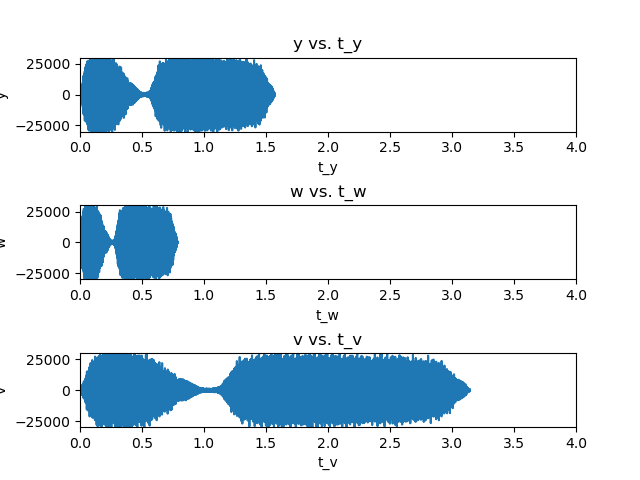

Text(0, 0.5, 'v')

In [50]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
# TODO: Code that solves B
fs, y = wav.read('train32.wav')
t_y = np.arange(0,len(y),1)*1/fs

# Part C
# TODO: Code that solves C
w,t_w = timescale(y,fs,2)
v, t_v = timescale(y,fs,0.5)

wav.write('y1.wav', fs, y.astype('int16'))
y1_play = sa.WaveObject.from_wave_file('y1.wav').play().wait_done()
wav.write('w1.wav', fs, w.astype('int16'))
w1_play = sa.WaveObject.from_wave_file('w1.wav').play().wait_done()
wav.write('v1.wav', fs, v.astype('int16'))
v1_play = sa.WaveObject.from_wave_file('v1.wav').play().wait_done()

# Part D
# TODO: Code that solves D
fig1 = plt.figure()
fig1.subplots_adjust(hspace=1.0,wspace=0.5)

plt.subplot(3,1,1)
plt.plot(t_y,y)
plt.xlim(0,4)
plt.ylim(-30000,30000)
plt.title('y vs. t_y')
plt.xlabel('t_y')
plt.ylabel('y')

plt.subplot(3,1,2)
plt.plot(t_w,w)
plt.xlim(0,4)
plt.ylim(-30000,30000)
plt.title('w vs. t_w')
plt.xlabel('t_w')
plt.ylabel('w')

plt.subplot(3,1,3)
plt.plot(t_v,v)
plt.xlim(0,4)
plt.ylim(-30000,30000)
plt.title('v vs. t_v')
plt.xlabel('t_v')
plt.ylabel('v')


###  Discussion

A time scaling factor of a = -1 would just cause the original sample to play in reverse. Running the figure command before every call to subplot would make each of the plots their own separate figure instead of all being part of the same figure. 


## Assignment 2 -- Time Shift Operation

In [30]:
# Assignment 2 - Time Shift Operation

# Part A
# TODO: Code that solves A
# Start with a comment section that explains what the input variables are
# inputs: 
# x: input signal 
# fs: sampling rate (Hz)
# t0: time shift in seconds
# returns: 
# y: shifted signal
# t: time sample vector

def timeshift(x,fs,t0):
    n0 = np.abs(int(t0 * fs))
    if t0 < 0:
        y = np.concatenate([np.zeros(n0),x])
    if t0 > 0:
        y = np.concatenate([x[n0:],np.zeros(n0)])
    else:
        y = x
        
    t = np.arange(0,len(y),1)*1/fs
        
    return y,t

<IPython.core.display.Javascript object>


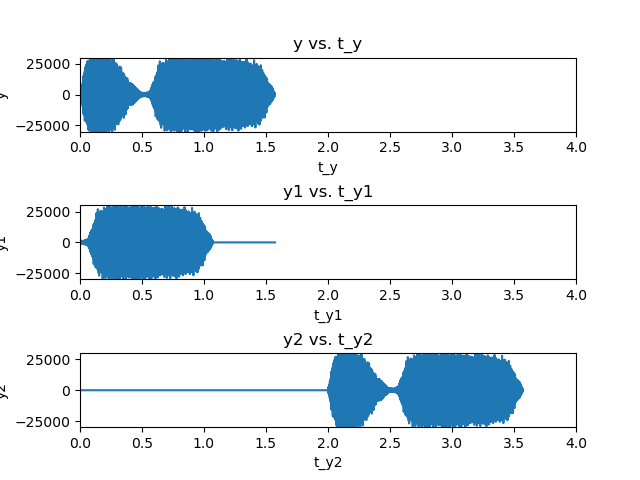

In [52]:
# Assignment 2 - Title of Assignment 2

# Part B
# TODO: Code that solves B
y1, t_y1 = timeshift(y,fs,0.5)
y2, t_y2 = timeshift(y,fs,-2)

fig1 = plt.figure()
fig1.subplots_adjust(hspace=1.0,wspace=0.5)

plt.subplot(3,1,1)
plt.plot(t_y,y)
plt.xlim(0,4)
plt.ylim(-30000,30000)
plt.title('y vs. t_y')
plt.xlabel('t_y')
plt.ylabel('y')

plt.subplot(3,1,2)
plt.plot(t_y1,y1)
plt.xlim(0,4)
plt.ylim(-30000,30000)
plt.title('y1 vs. t_y1')
plt.xlabel('t_y1')
plt.ylabel('y1')

plt.subplot(3,1,3)
plt.plot(t_y2,y2)
plt.xlim(0,4)
plt.ylim(-30000,30000)
plt.title('y2 vs. t_y2')
plt.xlabel('t_y2')
plt.ylabel('y2')


# Part C
# TODO: Code that solves C
wav.write('y_shift.wav', fs, y.astype('int16'))
y_shift_play = sa.WaveObject.from_wave_file('y_shift.wav').play().wait_done()
wav.write('y1_shift.wav', fs, y1.astype('int16'))
y1_shift_play = sa.WaveObject.from_wave_file('y1_shift.wav').play().wait_done()
wav.write('y2_shift.wav', fs, y2.astype('int16'))
y2_shift_play = sa.WaveObject.from_wave_file('y2_shift.wav').play().wait_done()


###  Discussion

We edited our implementation to take care of cases when t0 is 0, adding an else branch where y is set to the original signal, x. This way, the original signal is returned. If the shift is bigger than the original signal, the output is a list of zeros the same size of the original signal with our current implementation. 

## Assignment 3 -- Recovering Popular TV/Movie Audio File

<IPython.core.display.Javascript object>


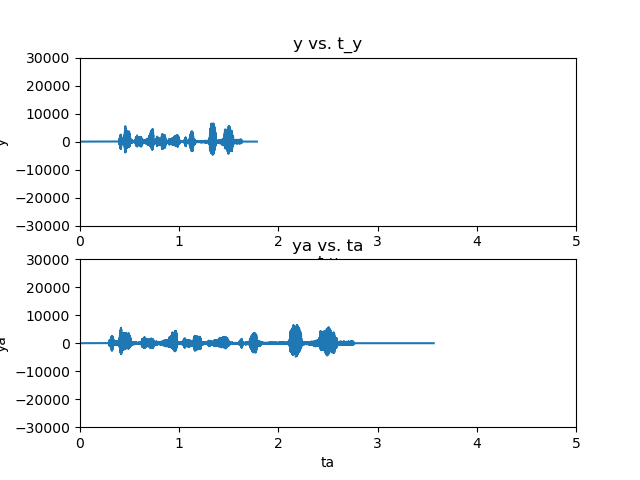

Text(0, 0.5, 'ya')

In [48]:
# Assignment 3 -- Recovering Popular TV/Movie Audio File

# Part A
# TODO: Code that solves A
fs, y = wav.read('s7.wav')

t_y = np.arange(0,len(y),1)*1/fs

ya, ta = timescale(y,fs,0.5)
ya, ta = timeshift(ya,fs,0.5)

yb, tb = timeshift(y,fs,2)
yb, tb = timescale(yb,fs,4)

# Part B
# TODO: Code that solves B
wav.write('ya.wav', fs, ya.astype('int16'))
ya_play = sa.WaveObject.from_wave_file('ya.wav').play().wait_done()
wav.write('yb.wav', fs, yb.astype('int16'))
yb_play = sa.WaveObject.from_wave_file('yb.wav').play().wait_done()

#Part C
# TODO: Code that solves C
fig3 = plt.figure()

plt.subplot(2,1,1)
plt.plot(t_y, y)
plt.xlim(0,5)
plt.ylim(-30000,30000)
plt.title('y vs. t_y')
plt.xlabel('t_y')
plt.ylabel('y')

plt.subplot(2,1,2)
plt.plot(ta, ya)
plt.xlim(0,5)
plt.ylim(-30000,30000)
plt.title('ya vs. ta')
plt.xlabel('ta')
plt.ylabel('ya')



### Discussion

The mischievous student used the transformation y(t) = x(2t-0.5). The quote is from Finding Nemo, said by Dory.
